In [1]:
import os
from pathlib import Path
from PIL import Image

In [82]:
from fastai.vision.data import ImageDataLoaders
from fastai.vision.all import *

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
model_path = Path(Path.cwd()).resolve().parents[0] / "models"

In [20]:
image_path = Path(Path.cwd()).resolve().parents[0] / "datasets" / "English" / "Fnt"
image_path.as_posix()

'/mnt/d/kaggle/datasets/English/Fnt'

In [69]:
def label_func(x):
    labels = []
    digits = [x for x in range(10)]
    caps= [chr(x) for x in range(65,91)]
    small = [chr(x) for x in range(97,123)]
    labels.extend(digits)
    labels.extend(caps)
    labels.extend(small)
    return labels

62

In [83]:
data = ImageDataLoaders.from_folder(image_path.as_posix(),
                                    valid_pct=0.1,
                                    train='train', 
                                    valid='valid',
                                    item_tfms=Resize(224),
                                    label_func=label_func,
                                  seed=0)

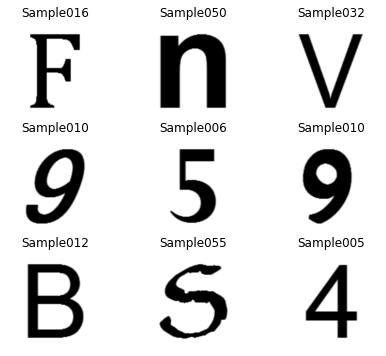

In [84]:
data.show_batch(figsize=(7,6))

In [77]:
# number of labels
data.c

62

In [85]:
learn = cnn_learner(data, resnet34, metrics=error_rate, model_dir=model_path.as_posix())
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
prediction = ClassificationInterpretation.from_learner(learn)
prediction.plot_top_losses(9)

In [ ]:
prediction.most_confused(min_val=2)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))